# SUMMER ANALYTICS 2024



# Week-1 Assignment

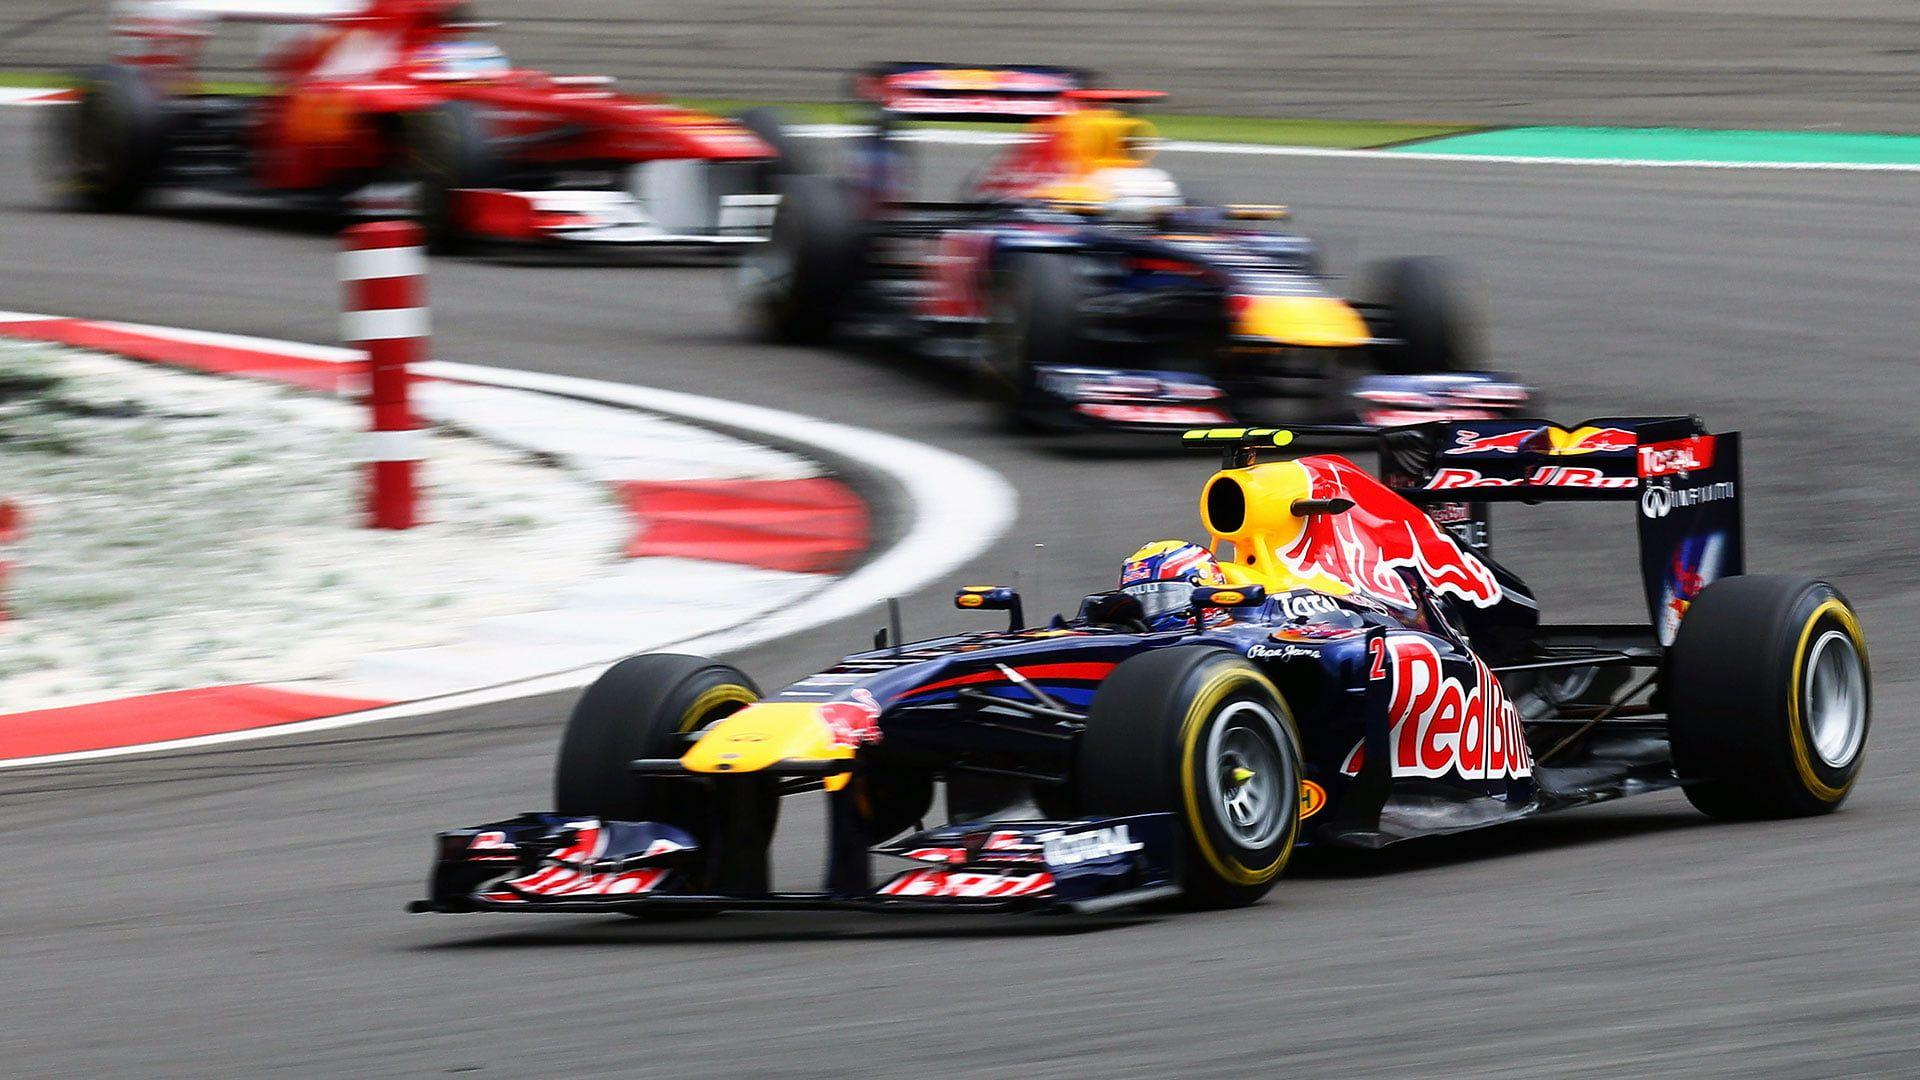

# **Data Grand Prix!**



**Welcome to your first assignment of Summer Analytics 2025! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about cars.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

image.avif

**So lets get started!! Buckle up your belts for this exciting ride!!**

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [30]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

### 2) Read the csv file and assign it to a variable .

In [10]:


     df = pd.read_csv('cars.csv')


### 3) Display shape of dataframe
Expected Output - (398, 9)

In [11]:
print(df.shape)

(398, 9)


### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [12]:
print(df.columns.values)


['mpg' 'cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'model_year' 'origin' 'name']


### 6) Set the 'name' column as the index of dataframe

In [13]:
df.set_index('name', inplace=True)

###  7) Print a list of all the unique mpg values





In [14]:
print(df['mpg'].unique())


[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


### 8) Create a column which contains the horsepower divided by weightas its metric and make this new column the index.

In [16]:
df['hp_per_weight'] = pd.to_numeric(df['horsepower'], errors='coerce') / pd.to_numeric(df['weight'], errors='coerce')
df.set_index('hp_per_weight', inplace=True)


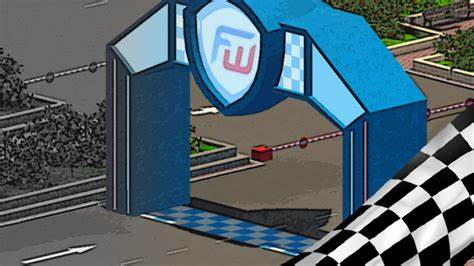

 **Checkpoint!!
Congratulations on making it this far. You are really keeping up in Data Grand Prix.
Now starts the real race i.e. graded questions of the quiz.**

## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. What is name of car that has the highest horsepower?  

In [ ]:
 pontiac grand prix

### 2. How many cars have mpg ≥ 35?

In [ ]:

36

### 3. What is the most common origin for cars with horsepower > 100 and weight < 3000?

In [ ]:
USA


### 4. What is the mean acceleration of cars from Japan? (rounded to 2 decimals)

In [ ]:
16.17


### 5. Which year had the highest average mpg?

In [ ]:
80



## *Congratulations on coming this far! Since we were having so much fun playing with this dataset, let's move towards finish line by attempting some Ungraded questions!*

### **Note:** These questions are UNGRADED, and are given as an extra exercise.

### Find the car (or cars) with the best ratio of horsepower to weight among all cars that also have above-median mpg.

In [ ]:
datsun 280-zx 

Horsepower: 132

Weight: 2910

Ratio: 0.0454

### Design a multi-line plot using Matplotlib or Seaborn that shows the evolution of average mpg over the years, separately for each origin

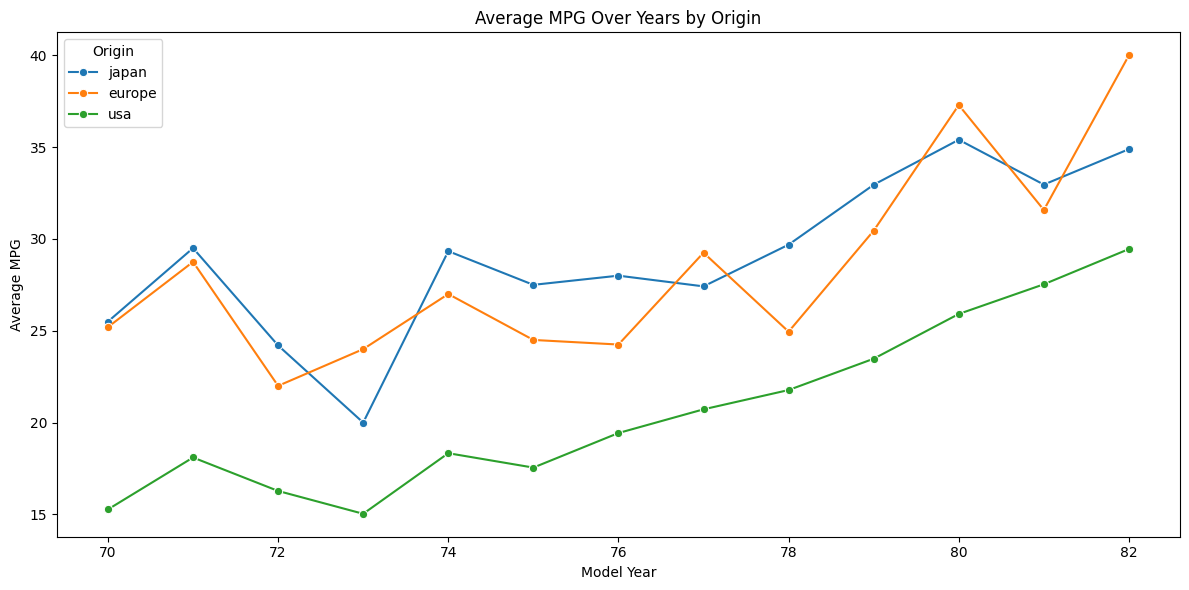

In [32]:


avg_mpg = df_reset.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_mpg, x='model_year', y='mpg', hue='origin', marker='o', hue_order=['japan', 'europe', 'usa'])
plt.title('Average MPG Over Years by Origin')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.legend(title='Origin')
plt.tight_layout()
plt.show()


### Create a Seaborn scatterplot (or PairGrid) where:

X = horsepower

Y = weight

Color by: origin

Size by: mpg

Hue order = ['japan', 'europe', 'usa']

Add meaningful plot titles and axis titles.

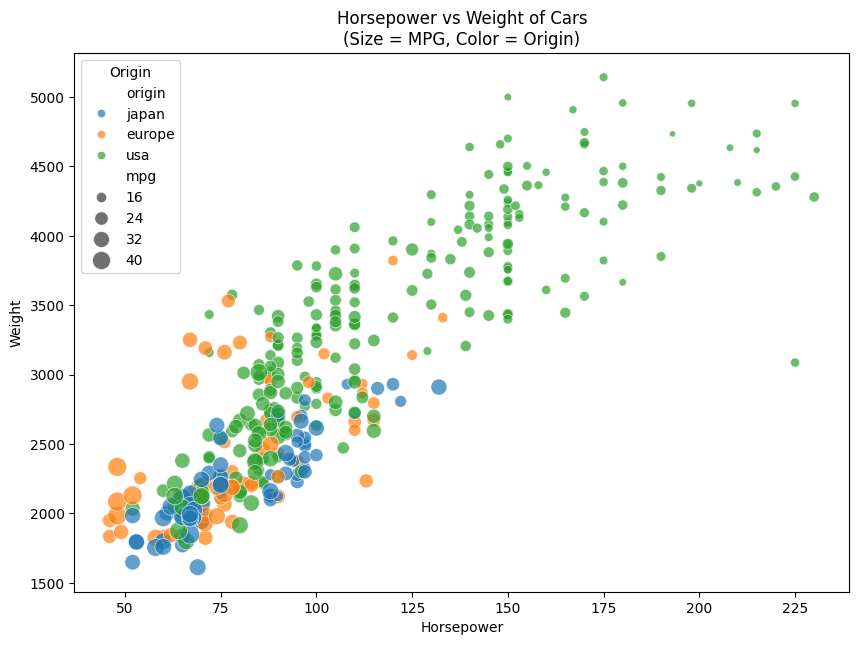

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# If you previously set a custom index, reset it for plotting
df_plot = df.reset_index()

# Convert columns to correct types and drop rows with missing values for plotting
df_plot['horsepower'] = pd.to_numeric(df_plot['horsepower'], errors='coerce')
df_plot['weight'] = pd.to_numeric(df_plot['weight'], errors='coerce')
df_plot['mpg'] = pd.to_numeric(df_plot['mpg'], errors='coerce')

# Drop rows with missing values in the columns used for plotting
df_plot = df_plot.dropna(subset=['horsepower', 'weight', 'mpg', 'origin'])

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_plot,
    x='horsepower',
    y='weight',
    hue='origin',
    size='mpg',
    hue_order=['japan', 'europe', 'usa'],
    sizes=(20, 200),
    alpha=0.7
)
plt.title('Horsepower vs Weight of Cars\n(Size = MPG, Color = Origin)')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.legend(title='Origin')
plt.show()

### We define a “consistent” car model as one that was produced over multiple years and had very low variation in mpg across those years (standard deviation < 1.0).

Tasks:

Identify car names that appear in more than one model_year.

For each such name, compute the standard deviation of mpg across years.

Return the car(s) with the lowest variation in mpg, among those with at least 2 appearances and std(mpg) < 1.0.

Report the model name(s), number of appearances, and the average mpg.

Bonus:
Sort the result by number of appearances (descending), then mpg (descending).

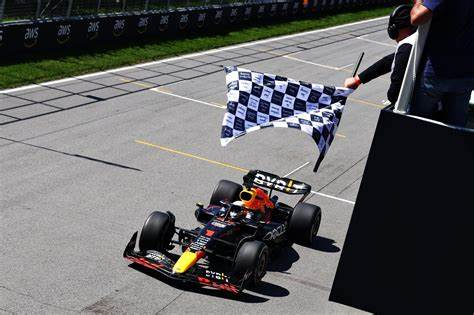

**Congratulations on completing the race. Kudos to you. Looking forward to meet you in next week.**